# Pymaceuticals Inc.
---

### Analysis

The following analysis is of an animal research study evaluating potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. The sample is of mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. Note that one mouse observation had conflicting duplicate data, so it was dropped and the final sample for this analysis covers 248 mice, treated with 10 different drugs. The sample is not balanced across the treatments as seen in the bar chart below, although it is balanced between male and female mice.

Summary statistic on tumor volume over the full period of observation indicate that average tumor volume was similar across most treatments (Capomulin and Ramicane standing out a noticably smaller). Although there is a much greater spread in variance across the different drugs. Further tests for statistical significance are need to determine whether such differences in tumor volume are meaningful.

Narrow the analysis to Capomulin, Ramicane, Infubinol, and Ceftamin, we see the same pattern in tumor volume for the final observation as we do for the full time period averages. Capomulin and Ramicane have noticeable lower tumor volumes.  There are very few outliers in the data, which is encouraging for external validity of any study results. In order to assess the effectiveness of the different treatment options, we should compare the change in tumor volume over the study period. Looking at tumor volume changes over time, we see that volume is decreasing, so I would suggest using change in volume as our key outcome variable.

Additional we see that tumor volume is positively correlated with mouse weight for the mice recieving capomulin, so we should consider controlling for weight in our analysis and as a potential pathway for heterogeneous treament effects.




 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Mouse ID"].loc[combined_df.duplicated(["Mouse ID", "Timepoint"])]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df["Mouse ID"]!='g989']
clean_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_druggrouped = clean_combined_df.groupby("Drug Regimen")

drug_mean = df_druggrouped[['Tumor Volume (mm3)']].mean().rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
drug_med = df_druggrouped[['Tumor Volume (mm3)']].median().rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
drug_var = df_druggrouped[['Tumor Volume (mm3)']].var().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
drug_sd = df_druggrouped[['Tumor Volume (mm3)']].std().rename(columns={'Tumor Volume (mm3)':'Tumor Volume St. Dev.'})
drug_sem = df_druggrouped[['Tumor Volume (mm3)']].sem().rename(columns={'Tumor Volume (mm3)':'Tumor Volume St. Err.'})

tumor_vol_sumstats = drug_mean
for stat in [drug_med,drug_var,drug_sd,drug_sem]:
    tumor_vol_sumstats =pd.merge(tumor_vol_sumstats,stat, on='Drug Regimen')

tumor_vol_sumstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_aggstats = df_druggrouped.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
tumor_vol_sumstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

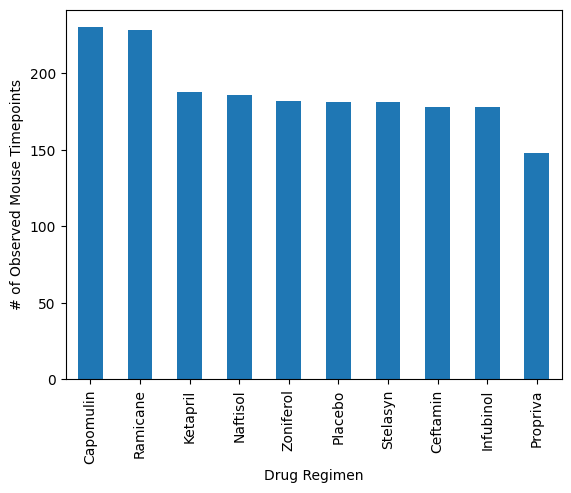

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_sample_counts = clean_combined_df.groupby('Drug Regimen').size().sort_values(ascending=False)
drug_sample_counts.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()

Text(0, 0.5, '# of Observed Mouse Timepoints')

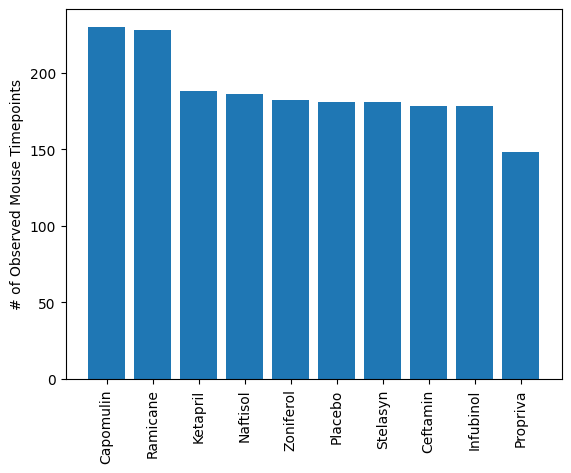

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_sample_counts.index, drug_sample_counts)
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

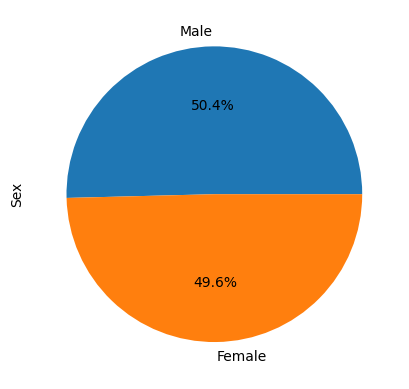

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
mouse_grouped = clean_mouse_metadata.groupby('Sex').size().sort_values(ascending=False)
    #Note to grader: I'm not sure why my numbers are a little different from the numbers displayed in the starter code.
    # My mouse totals are 125 male and 123 female, which totals to 248, matching the mouse count in our cleaned dataframe

mouse_grouped.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')
plt.show()


Text(0, 0.5, 'Sex')

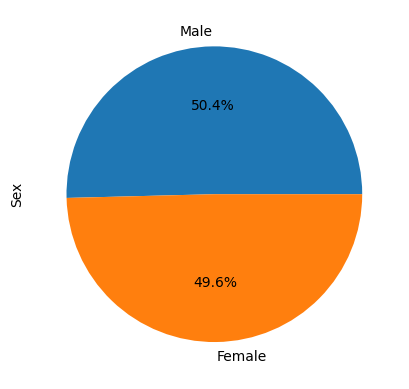

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_grouped,labels=mouse_grouped.index , autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

sorted_data = clean_combined_df.sort_values(by=['Mouse ID', 'Timepoint'])

last_timepoint_df = sorted_data.drop_duplicates(subset='Mouse ID', keep='last') #keeping data from last timepoint for each mouse

drug_subset = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

df_last_timepoint_drug_subset = last_timepoint_df[last_timepoint_df['Drug Regimen'].isin(drug_subset)] #keeping last


In [14]:
#Generating final tumor volume stats

#Making quantiles for use in agg
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

last_tumor_stats_all = df_last_timepoint_drug_subset.agg({'Tumor Volume (mm3)': ['min', q25, q75,'max']}).transpose().reset_index(drop=True)
last_tumor_stats_all['Drug Regimen'] = 'all'
last_tumor_stats = df_last_timepoint_drug_subset.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['min', q25, q75,'max']})
last_tumor_stats = last_tumor_stats['Tumor Volume (mm3)'].reset_index()
last_tumor_stats = pd.concat([last_tumor_stats,last_tumor_stats_all]).set_index('Drug Regimen')
last_tumor_stats['iqr'] = last_tumor_stats['q75'] - last_tumor_stats['q25']
last_tumor_stats['LB_outlier'] = last_tumor_stats['q25'] -1.5*last_tumor_stats['iqr']
last_tumor_stats['UB_outlier'] = last_tumor_stats['q75'] +1.5*last_tumor_stats['iqr']
last_tumor_stats['Flag_LB_outlier'] = last_tumor_stats['min'] < last_tumor_stats['LB_outlier']
last_tumor_stats['Flag_UB_outlier'] = last_tumor_stats['max'] > last_tumor_stats['UB_outlier']

last_tumor_stats

,min,q25,q75,max,iqr,LB_outlier,UB_outlier,Flag_LB_outlier,Flag_UB_outlier
Drug Regimen,,,,,,,,,
Capomulin,23.343598,32.377357,40.159220,47.685963,7.781863,20.704562,51.832015,False,False
Ceftamin,45.000000,48.722078,64.299830,68.923185,15.577752,25.355450,87.666458,False,False
Infubinol,36.321346,54.048608,65.525743,72.226731,11.477135,36.832905,82.741446,True,False
Ramicane,22.050126,31.560470,40.659006,45.220869,9.098537,17.912664,54.306811,False,False
all,22.050126,37.187744,59.930262,72.226731,22.742518,3.073967,94.044039,False,False


In [15]:
df_last_timepoint_drug_subset.loc[(df_last_timepoint_drug_subset['Drug Regimen']==drug_subset[0]), ['Tumor Volume (mm3)']]

,Tumor Volume (mm3)
309,38.982878
299,38.939633
64,30.485985
244,37.074024
360,40.159220
440,47.685963
204,37.311846
337,38.125164
317,38.753265
380,41.483008


In [16]:
#Generating lists of drug specific tumor volumes
tumor_volumes = dict()
for drug in drug_subset:
    data = df_last_timepoint_drug_subset.loc[df_last_timepoint_drug_subset['Drug Regimen']==drug, ['Tumor Volume (mm3)']]
    tumor_volumes[drug] = data['Tumor Volume (mm3)'].values

tumor_volumes = pd.DataFrame.from_dict(tumor_volumes)

In [17]:
#Listing outliers

for drug in drug_subset:
    if last_tumor_stats.loc[drug, 'Flag_LB_outlier']==True | last_tumor_stats.loc[drug, 'Flag_UB_outlier']==True:
        outliers = tumor_volumes.loc[(tumor_volumes[drug]< last_tumor_stats.loc[drug,"LB_outlier"] )| (tumor_volumes[drug]> last_tumor_stats.loc[drug, "UB_outlier"]), drug]
        print(f'{drug}s potential outliers are: {outliers}')

    else:
        print(f'{drug} has no potential outliers')


Capomulin has no potential outliers
Ramicane has no potential outliers
Infubinols potential outliers are: 5    36.321346
Name: Infubinol, dtype: float64
Ceftamin has no potential outliers


Text(0, 0.5, 'Final Tumor Volume (mm3)')

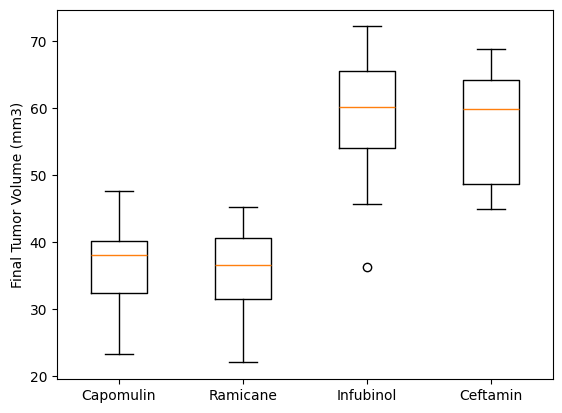

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes)
plt.xticks(np.arange(1,len(drug_subset)+1),drug_subset)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

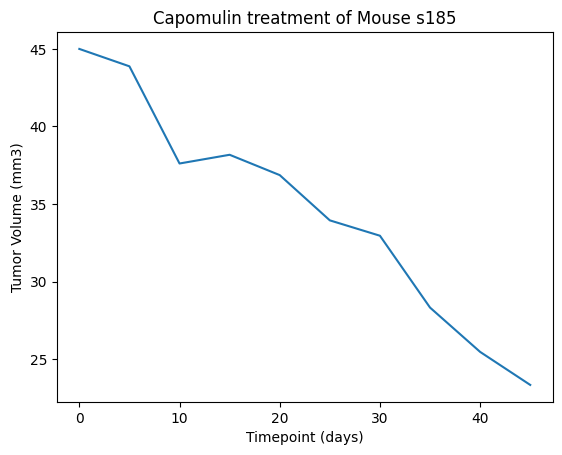

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185 = clean_combined_df.loc[clean_combined_df["Mouse ID"]=='s185']

plt.plot(mouse_s185['Timepoint'],mouse_s185['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

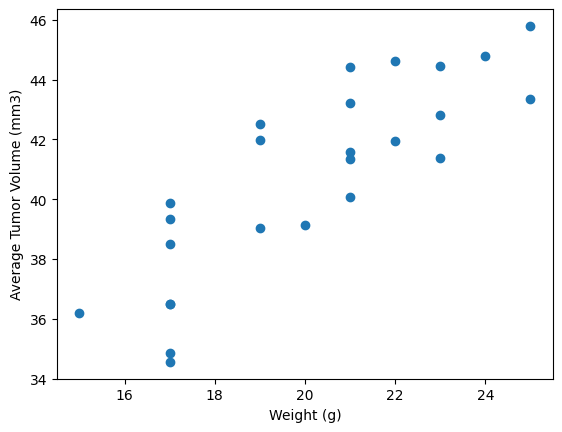

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_combined_df.loc[(clean_combined_df['Drug Regimen']=='Capomulin')]
capomulin_mice = capomulin_mice.groupby('Mouse ID').agg({'Tumor Volume (mm3)': ['mean'], 'Weight (g)': ['mean']})

plt.scatter(capomulin_mice["Weight (g)"],capomulin_mice['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


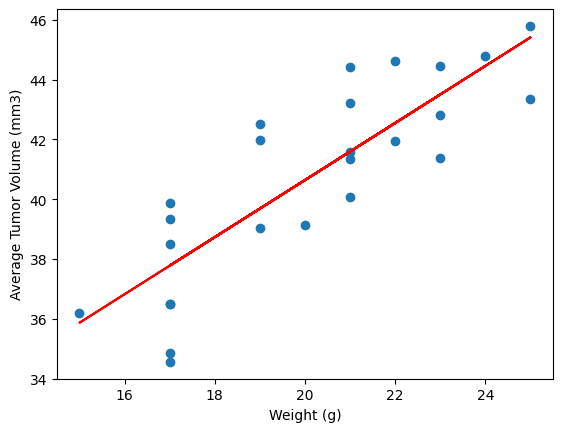

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_mice["Weight (g)"].values
y_values = capomulin_mice['Tumor Volume (mm3)'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[:,0],y_values[:,0])
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
